In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

In [24]:
df=pd.read_csv("Amazon Sales Data.csv", encoding="unicode_escape")

In [7]:
df.shape

(11251, 13)

In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [10]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
#dropping null values
df.dropna(inplace=True)

In [16]:
df['Amount'] = df['Amount'].astype('int')

In [17]:
df['Amount'].dtype

dtype('int32')

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [20]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

GENDER

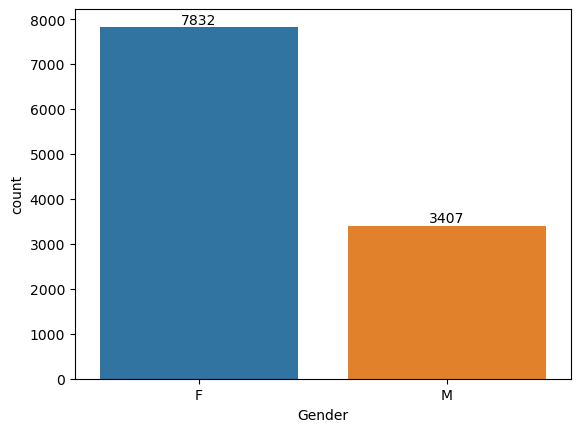

In [21]:
ax=sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

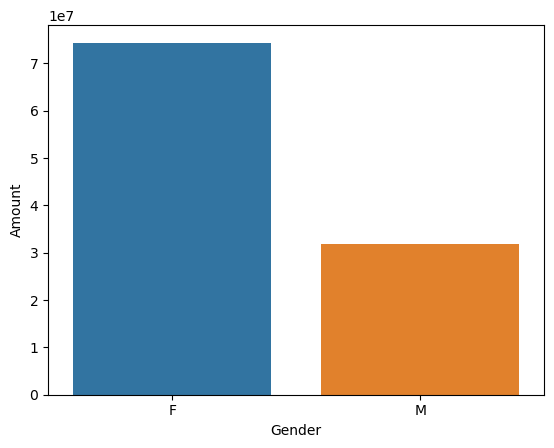

In [29]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum()
sns.barplot(x='Gender', y= 'Amount',data=sales_gen)

Through the above graphs we can clearly see that most of the buyers are females and the female spend more amount than males.

AGE

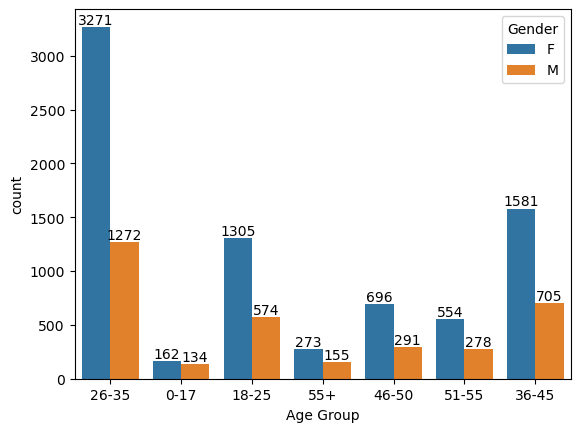

In [31]:
ax=sns.countplot(data=df, x="Age Group",hue="Gender")

for bars in ax.containers:
    ax.bar_label(bars)


From the above graph we can analyse that the females of age group 26-35 are the most of the buyers.

STATE

<Axes: xlabel='State', ylabel='Orders'>

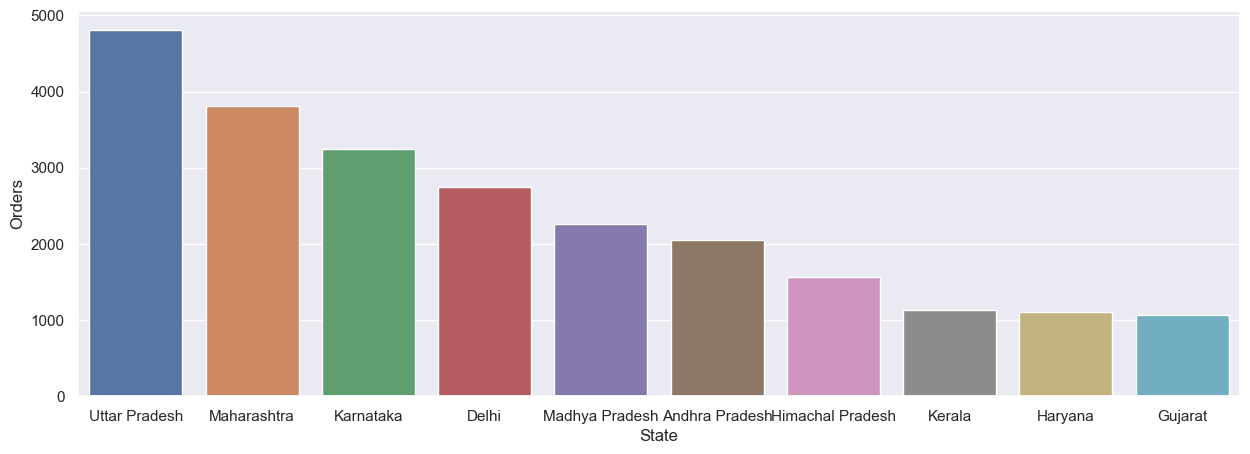

In [34]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})

sns.barplot(data=sales_state , x= 'State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

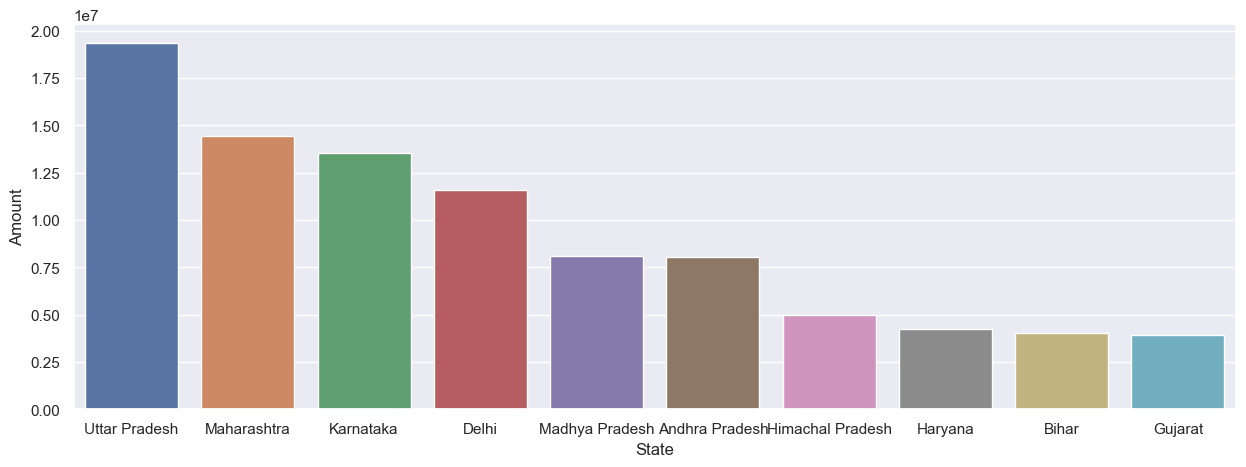

In [36]:
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})

sns.barplot(data=sales_state , x= 'State',y='Amount')

We can see that most of the orders are from Uttar Pradesh, Maharashtra and karnataka.

MARITAL STATUS

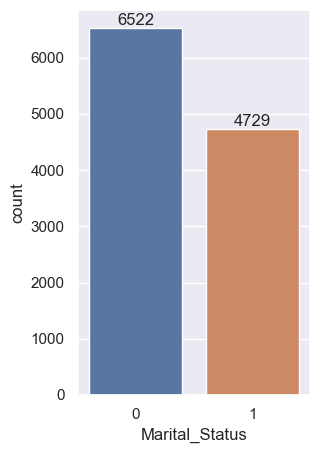

In [45]:
ax=sns.countplot(data=df, x='Marital_Status')

sns.set(rc={'figure.figsize':(3,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

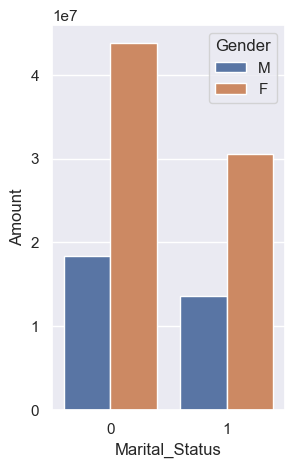

In [47]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False).sum().sort_values(by='Amount').head(10)

sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

From the above graph we can see that most of the buyers are married Women and they are havinh high purchasing power

OCCUPATION

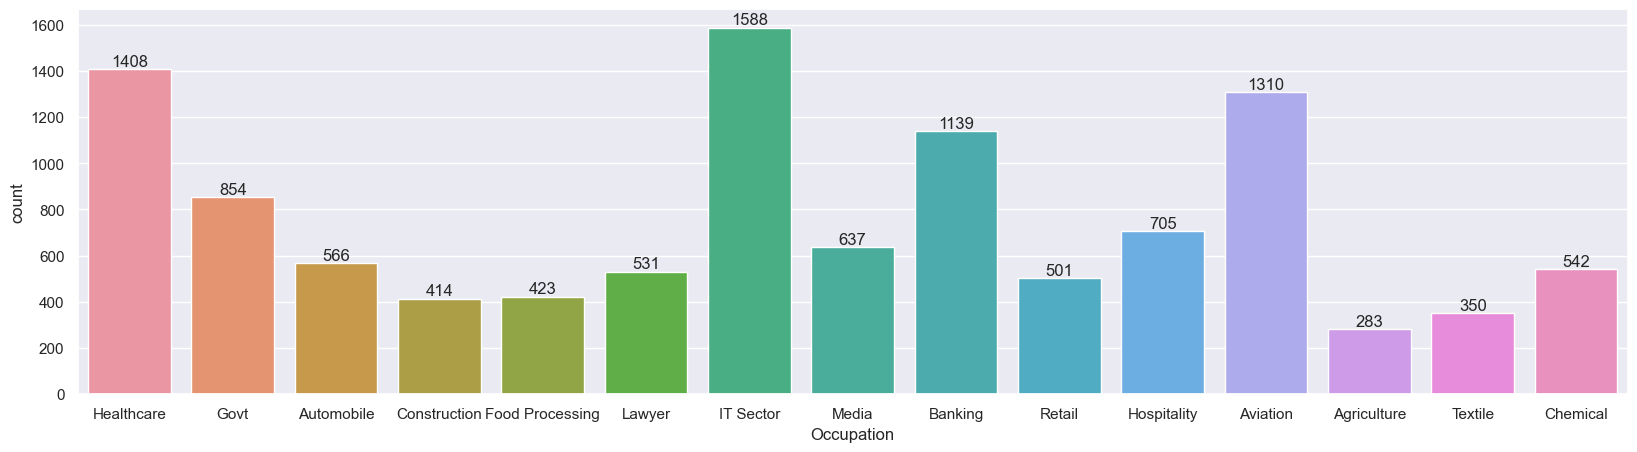

In [51]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

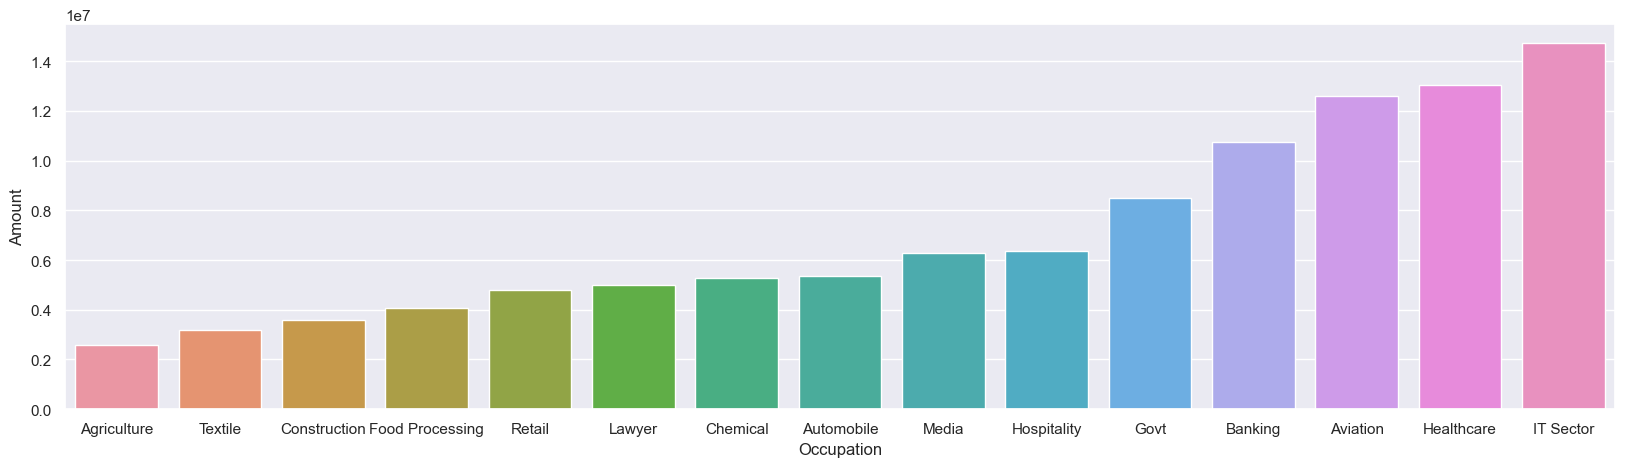

In [52]:
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount')
sns.barplot(data=sales_state, x='Occupation',y='Amount')

From the above graph we can see that most the buyers belong to the occupations such as IT Sector, Healthcare and Aviation.

PRODUCT CATEGORY

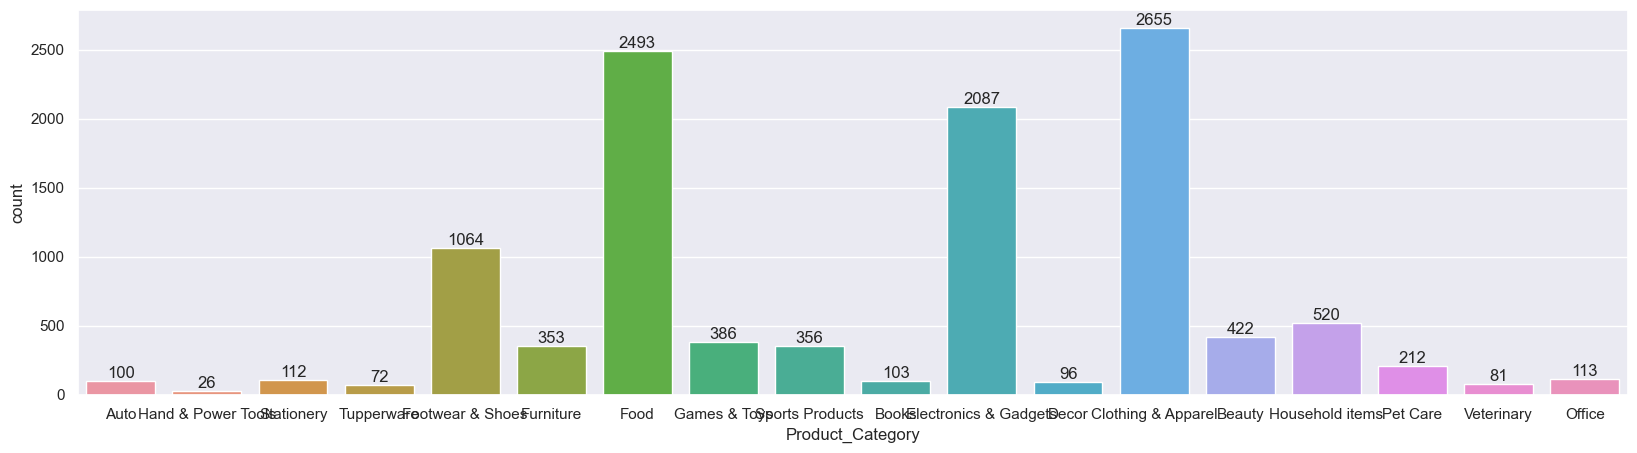

In [54]:
ax=sns.countplot(data=df,x='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

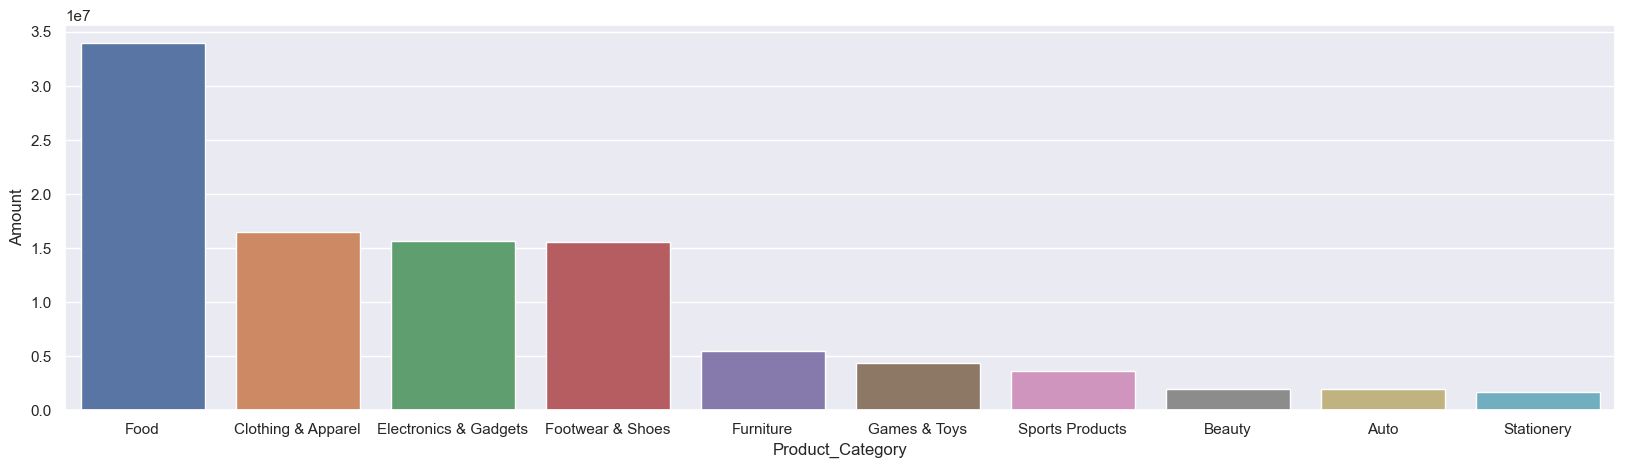

In [59]:
sales_state=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(data=sales_state, x='Product_Category',y='Amount')

From the above graph we can clearly see that the most product sold are Food, Clothing & Apparel and Electronics and Gadgets

# Conclusion

Married women of age group 26-35 years from uttar pradesh, Maharashtra and karnataka working in IT, Healthcare and aviation occupations shop more of products like Food ,Clothing and Electronics